# Clustering TCR Sequences

Following featurization of the TCRSeq data, users will often want to cluster the TCRSeq data to identify possible antigen-specific clusters of sequences. In order to do this, we have provided multiple ways for clustering your TCR sequences.

## Phenograph Clustering

The first method we will explore is using a network-graph based clustering algorithm called Phenograph (https://github.com/jacoblevine/PhenoGraph). This method automatically determines the number of clusters in the data by maximizing the modularity of the network-graph asssembled from the data. Of note, this algorithm is very fast and will be useful for when there are possibly thousands to tens of thouands of sequences to cluster. However, clusters by this method tend to be quite large.

First, we will load data and train the VAE.

In [1]:
%%capture
import sys
sys.path.append('../../')
from DeepTCR.DeepTCR import DeepTCR_U

# Instantiate training object
DTCRU = DeepTCR_U('Tutorial')

#Load Data from directories
DTCRU.Get_Data(directory='../../Data/Murine_Antigens',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=0,count_column=1,v_beta_column=2,j_beta_column=3)

#Train VAE
DTCRU.Train_VAE(Load_Prev_Data=False)


We will then run the clustering command.

In [2]:
DTCRU.Cluster(clustering_method='phenograph')

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.123966693878174 seconds
Jaccard graph constructed in 1.346548080444336 seconds
Wrote graph to binary file in 0.27414608001708984 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.88954
After 2 runs, maximum modularity is Q = 0.890821
Louvain completed 22 runs in 4.129039287567139 seconds
PhenoGraph complete in 7.9022862911224365 seconds
Clustering Done


Following clustering, we can view the clustering solutions by looking at the object variable called Cluster_DFs.

In [3]:
DFs = DTCRU.Cluster_DFs
print(DFs[0])

    Alpha_Sequences     Beta_Sequences   Labels                Sample  \
0              None      CASSPGASSDYTF    Db-F2             Db-F2.tsv   
1              None      CASSPGANSDYTF    Db-F2             Db-F2.tsv   
2              None     CASSPGTGGWAPLF    Db-F2             Db-F2.tsv   
3              None    CASSRDISYNSPLYF    Db-F2             Db-F2.tsv   
4              None     CASSQGQIGSDYTF    Db-F2             Db-F2.tsv   
5              None      CASSQGAYSDYTF    Db-F2             Db-F2.tsv   
6              None    CASSPDSSYNSPLYF    Db-F2             Db-F2.tsv   
7              None     CASSAGTGGKAPLF    Db-F2             Db-F2.tsv   
8              None    CASRPDISYNSPLYF    Db-F2             Db-F2.tsv   
9              None     CASSMGTGFSDYTF    Db-F2             Db-F2.tsv   
10             None      CASSLGSQNTLYF   Db-M45            Db-M45.tsv   
11             None      CASSLTSNSDYTF   Db-M45            Db-M45.tsv   
12             None      CASSLGGQNTLYF   Db-M45    

We can also choose to save these results to a directory called Name of object + '_Results' by setting the write_to_sheets parameter to True. There, we can find the propritons of every sample in each cluster and csv files for every cluster detailing the sequence information with other information as well.

In [4]:
DTCRU.Cluster(clustering_method='phenograph',write_to_sheets=True)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.1649014949798584 seconds
Jaccard graph constructed in 1.3692421913146973 seconds
Wrote graph to binary file in 0.25616955757141113 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.889114
After 3 runs, maximum modularity is Q = 0.890796
Louvain completed 23 runs in 3.6276657581329346 seconds
PhenoGraph complete in 7.433722734451294 seconds
Clustering Done


We can also employ two other clustering algorithms (hierarchical clustering and DBSCAN). For these types of methods, we can either control the settings for the algorithm such as the threshold parameter (t), the criterion/linkage algorithm for heirarchical clustering, or we can allow the method to determine the optimal threshold parameter by maximizing the silhoutte score of the clustering solution. First, if we run hierarchial clustering letting the program determing the right threshold parameters:

## Hierarchical Clustering

In [5]:
DTCRU.Cluster(clustering_method='hierarchical')

Clustering Done


Or we can set the parameters ourselves.

In [6]:
DTCRU.Cluster(clustering_method='hierarchical',criterion='distance',t=1.0)

Clustering Done


## DBSCAN clustering

And to use DBSCAN...

In [7]:
DTCRU.Cluster(clustering_method='dbscan')

Clustering Done


In the case there are perhaps too many sequences to efficiently cluster the data quickly, one can downsample the data and then use a k-nearest neighbor algorithm to classify the rest of the sequences like so .Here, we will downsample 500 sequenes for clustering and then assign the rest via KNN.

In [8]:
DTCRU.Cluster(clustering_method='phenograph',sample=500)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.15642714500427246 seconds
Jaccard graph constructed in 0.2672147750854492 seconds
Wrote graph to binary file in 0.14577651023864746 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.692053
After 2 runs, maximum modularity is Q = 0.697311
After 3 runs, maximum modularity is Q = 0.700883
Louvain completed 23 runs in 3.4247944355010986 seconds
PhenoGraph complete in 4.003698348999023 seconds
Clustering Done


Finally, we can visualize the clustering results through a UMAP representation of the sequences.

## Clustering Visualization

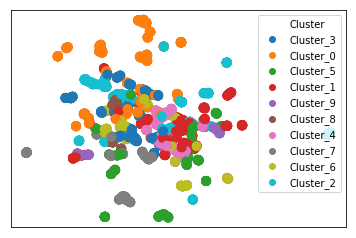

In [9]:
DTCRU.UMAP_Plot(by_cluster=True)